# Hotel_Demand_Prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column',None)

In [3]:
df=pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,July 2015,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,July 2015,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,July 2015,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,July 2015,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,July 2015,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_month_year              119390 non-null  object 
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-null  float64
 12  babies          

## Exploratory Data Analysis

In [5]:
df.describe(percentiles=(0.01,0.1,0.25,0.5,0.75,0.9,0.99)).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.0,0.0,0.00,0.000,1.0,1.0,1.00,1.0
lead_time,119390.0,104.011416,106.863097,0.00,0.0,3.0,18.00,69.000,160.0,265.0,444.00,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2015.0,2015.0,2016.00,2016.000,2017.0,2017.0,2017.00,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,2.0,8.0,16.00,28.000,38.0,46.0,53.00,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,1.0,4.0,8.00,16.000,23.0,28.0,31.00,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.0,0.0,0.00,1.000,2.0,2.0,4.00,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,0.0,1.0,1.00,2.000,3.0,5.0,10.00,50.0
adults,119390.0,1.856403,0.579261,0.00,1.0,1.0,2.00,2.000,2.0,2.0,3.00,55.0
children,119386.0,0.103890,0.398561,0.00,0.0,0.0,0.00,0.000,0.0,0.0,2.00,10.0
babies,119390.0,0.007949,0.097436,0.00,0.0,0.0,0.00,0.000,0.0,0.0,0.00,10.0


### Splitting dataset into indepndent and target variables

In [6]:
X=df.drop(['is_canceled'],axis=1)
y=df[['is_canceled']]

### Splitting independent variables into numericals and categorical variables

In [7]:
X_num=X.select_dtypes('number')
X_char=X.select_dtypes('object')

### Value counts of numerical variables

In [8]:
def unique_values(X):
    X=X.value_counts().count()
    return(X)
X_num_value_counts=pd.DataFrame(X_num.apply(lambda x: unique_values(x)),columns=['Value_counts'])
X_num_value_counts

,Value_counts
lead_time,479
arrival_date_year,3
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_weekend_nights,17
stays_in_week_nights,35
adults,14
children,5
babies,5
is_repeated_guest,2


### Seperating features having value counts less than 20

In [9]:
X_cat=X_num[X_num_value_counts[X_num_value_counts['Value_counts']<=20].index]
X_cat.head()

,arrival_date_year,stays_in_weekend_nights,adults,children,babies,is_repeated_guest,previous_cancellations,required_car_parking_spaces,total_of_special_requests
0,2015,0,2,0.0,0,0,0,0,0
1,2015,0,2,0.0,0,0,0,0,0
2,2015,0,1,0.0,0,0,0,0,0
3,2015,0,1,0.0,0,0,0,0,0
4,2015,0,2,0.0,0,0,0,0,1


In [10]:
X_cat.shape

(119390, 9)

In [11]:
X_num=X_num[X_num_value_counts[X_num_value_counts['Value_counts']>20].index]
X_num.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr
0,342,27,1,0,0,3,NaN,NaN,0,0.0
1,737,27,1,0,0,4,NaN,NaN,0,0.0
2,7,27,1,1,0,0,NaN,NaN,0,75.0
3,13,27,1,1,0,0,304.0,NaN,0,75.0
4,14,27,1,2,0,0,240.0,NaN,0,98.0


In [12]:
X_num.shape

(119390, 10)

### Concating categorical and numerical features having < 20 features

In [13]:
X_char=pd.concat([X_cat,X_char],axis=1)
X_char.shape

(119390, 22)

In [14]:
X_num.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
lead_time,119390.0,104.011416,106.863097,0.00,0.0,3.0,18.00,69.000,160.0,265.0,444.00,737.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,2.0,8.0,16.00,28.000,38.0,46.0,53.00,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,1.0,4.0,8.00,16.000,23.0,28.0,31.00,31.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,0.0,1.0,1.00,2.000,3.0,5.0,10.00,50.0
previous_bookings_not_canceled,119390.0,0.137097,1.497437,0.00,0.0,0.0,0.00,0.000,0.0,0.0,3.00,72.0
booking_changes,119390.0,0.221124,0.652306,0.00,0.0,0.0,0.00,0.000,0.0,1.0,3.00,21.0
agent,103050.0,86.693382,110.774548,1.00,1.0,6.0,9.00,14.000,229.0,241.0,390.00,535.0
company,6797.0,189.266735,131.655015,6.00,16.0,40.0,62.00,179.000,270.0,390.4,513.04,543.0
days_in_waiting_list,119390.0,2.321149,17.594721,0.00,0.0,0.0,0.00,0.000,0.0,0.0,75.00,391.0
adr,119390.0,101.831122,50.535790,-6.38,0.0,50.0,69.29,94.575,126.0,164.0,252.00,5400.0


### Distribution plots

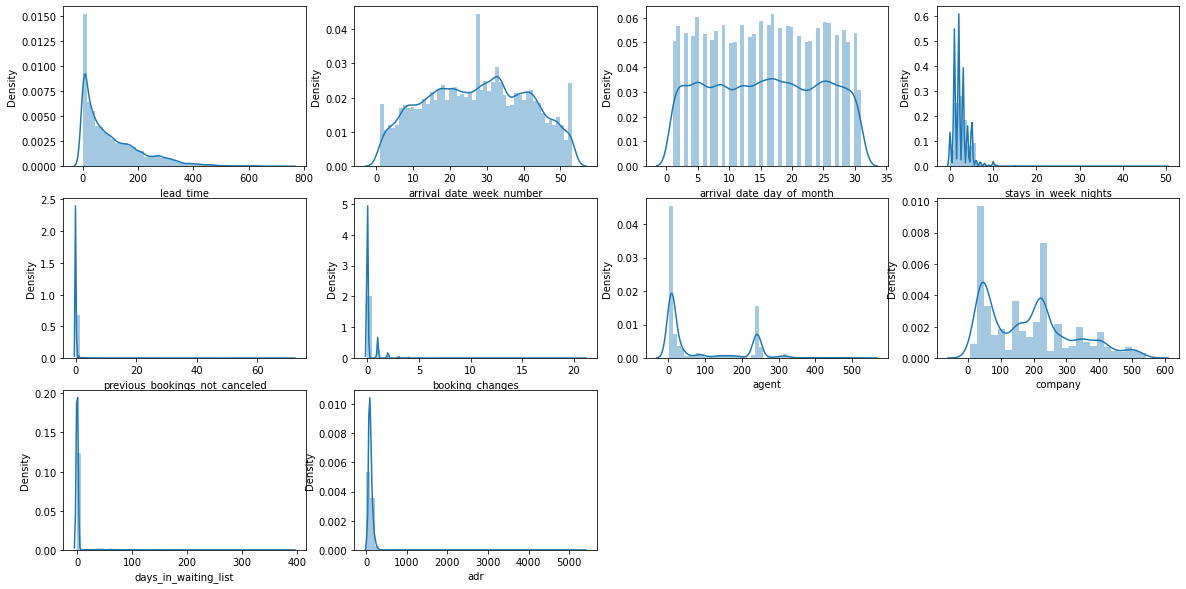

In [15]:
plt.figure(figsize=(20,10))
for i,var in enumerate(X_num.columns,1):
    plt.subplot(3,4,i)
    sns.distplot(X_num[var])

### Outliers handling 

Capping of the outliers which are <1% and >99%.

In [16]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)
X_num=X_num.apply(lambda x: outlier_cap(x))
X_num.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
lead_time,119390.0,103.409180,104.600923,0.0,0.0,3.0,18.00,69.000,160.0,265.0,444.0000,444.00
arrival_date_week_number,119390.0,27.173943,13.588582,2.0,2.0,8.0,16.00,28.000,38.0,46.0,53.0000,53.00
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.0,1.0,4.0,8.00,16.000,23.0,28.0,31.0000,31.00
stays_in_week_nights,119390.0,2.479211,1.761267,0.0,0.0,1.0,1.00,2.000,3.0,5.0,10.0000,10.00
previous_bookings_not_canceled,119390.0,0.060273,0.376351,0.0,0.0,0.0,0.00,0.000,0.0,0.0,3.0000,3.00
booking_changes,119390.0,0.209574,0.555245,0.0,0.0,0.0,0.00,0.000,0.0,1.0,3.0000,3.00
agent,103050.0,86.008598,108.591334,1.0,1.0,6.0,9.00,14.000,229.0,241.0,390.0000,390.00
company,6797.0,189.206373,131.297172,16.0,16.0,40.0,62.00,179.000,270.0,390.4,513.0016,513.04
days_in_waiting_list,119390.0,1.606902,9.760268,0.0,0.0,0.0,0.00,0.000,0.0,0.0,75.0000,75.00
adr,119390.0,101.461251,46.905036,0.0,0.0,50.0,69.29,94.575,126.0,164.0,252.0000,252.00


### Distribution plots after outlier capping

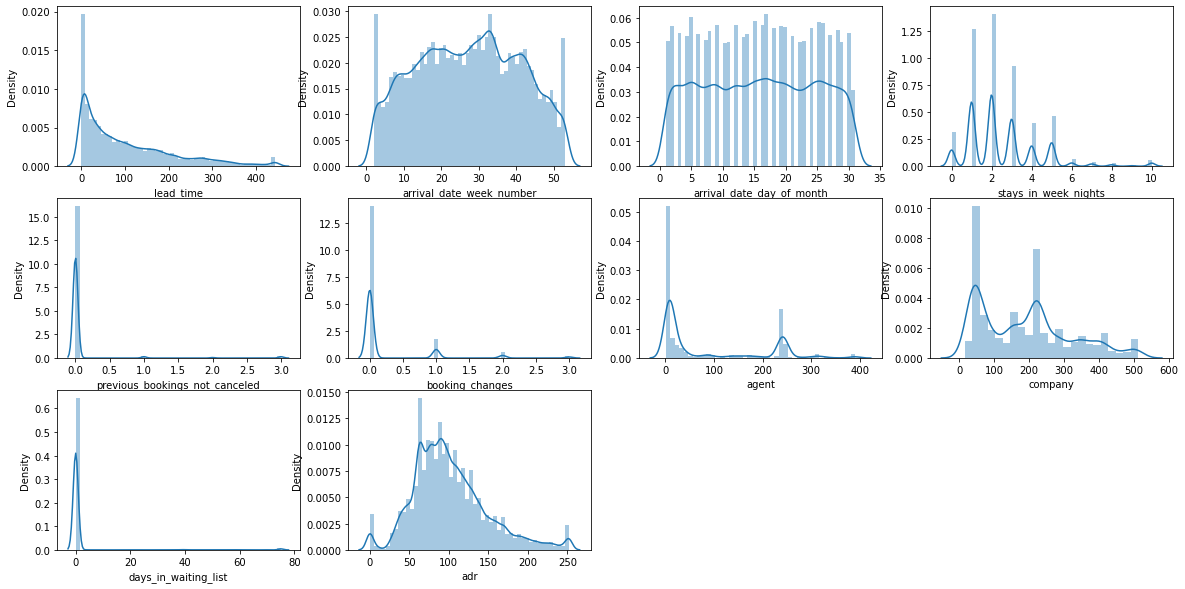

In [17]:
plt.figure(figsize=(20,10))
for i,var in enumerate(X_num.columns,1):
    plt.subplot(3,4,i)
    sns.distplot(X_num[var])

### Missing value calculations

In [18]:
pd.DataFrame(X_num.isnull().mean()*100,columns=['% of missing values'])

,% of missing values
lead_time,0.000000
arrival_date_week_number,0.000000
arrival_date_day_of_month,0.000000
stays_in_week_nights,0.000000
previous_bookings_not_canceled,0.000000
booking_changes,0.000000
agent,13.686238
company,94.306893
days_in_waiting_list,0.000000
adr,0.000000


In [19]:
pd.DataFrame(X_char.isnull().mean()*100,columns=['% of missing values'])

,% of missing values
arrival_date_year,0.000000
stays_in_weekend_nights,0.000000
adults,0.000000
children,0.003350
babies,0.000000
is_repeated_guest,0.000000
previous_cancellations,0.000000
required_car_parking_spaces,0.000000
total_of_special_requests,0.000000
hotel,0.000000


### Dropping features having more than 25% missing values

In [20]:
X_num=X_num.loc[:,(X_num.isnull().mean()<0.25)]
X_num.shape

(119390, 9)

### Missing values imputation using SimpleImputer

In [21]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
X_num=pd.DataFrame(imputer.fit_transform(X_num),index=X_num.index,columns=X_num.columns)
X_num.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr
0,342.0,27.0,1.0,0.0,0.0,3.0,86.008598,0.0,0.0
1,444.0,27.0,1.0,0.0,0.0,3.0,86.008598,0.0,0.0
2,7.0,27.0,1.0,1.0,0.0,0.0,86.008598,0.0,75.0
3,13.0,27.0,1.0,1.0,0.0,0.0,304.000000,0.0,75.0
4,14.0,27.0,1.0,2.0,0.0,0.0,240.000000,0.0,98.0


In [22]:
pd.DataFrame(X_num.isnull().mean()*100,columns=['% of missing values'])

,% of missing values
lead_time,0.0
arrival_date_week_number,0.0
arrival_date_day_of_month,0.0
stays_in_week_nights,0.0
previous_bookings_not_canceled,0.0
booking_changes,0.0
agent,0.0
days_in_waiting_list,0.0
adr,0.0


In [23]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X_char=pd.DataFrame(imputer.fit_transform(X_char),index=X_char.index,columns=X_char.columns)
X_char.head()

,arrival_date_year,stays_in_weekend_nights,adults,children,babies,is_repeated_guest,previous_cancellations,required_car_parking_spaces,total_of_special_requests,hotel,arrival_month_year,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,2015,0,2,0,0,0,0,0,0,Resort Hotel,July 2015,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,01-07-2015
1,2015,0,2,0,0,0,0,0,0,Resort Hotel,July 2015,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,01-07-2015
2,2015,0,1,0,0,0,0,0,0,Resort Hotel,July 2015,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,02-07-2015
3,2015,0,1,0,0,0,0,0,0,Resort Hotel,July 2015,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,02-07-2015
4,2015,0,2,0,0,0,0,0,1,Resort Hotel,July 2015,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,03-07-2015


In [24]:
pd.DataFrame(X_char.isnull().mean()*100,columns=['% of missing values'])

,% of missing values
arrival_date_year,0.0
stays_in_weekend_nights,0.0
adults,0.0
children,0.0
babies,0.0
is_repeated_guest,0.0
previous_cancellations,0.0
required_car_parking_spaces,0.0
total_of_special_requests,0.0
hotel,0.0


### Numerical features selection using VarianceThreshold

In [25]:
from sklearn.feature_selection import VarianceThreshold
varselect=VarianceThreshold(threshold=0)
varselect.fit_transform(X_num)
cols=varselect.get_support(indices=True)
X_num=X_num.iloc[:,cols]
X_num.iloc[0]

lead_time                         342.000000
arrival_date_week_number           27.000000
arrival_date_day_of_month           1.000000
stays_in_week_nights                0.000000
previous_bookings_not_canceled      0.000000
booking_changes                     3.000000
agent                              86.008598
days_in_waiting_list                0.000000
adr                                 0.000000
Name: 0, dtype: float64

In [26]:
X_num.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr
0,342.0,27.0,1.0,0.0,0.0,3.0,86.008598,0.0,0.0
1,444.0,27.0,1.0,0.0,0.0,3.0,86.008598,0.0,0.0
2,7.0,27.0,1.0,1.0,0.0,0.0,86.008598,0.0,75.0
3,13.0,27.0,1.0,1.0,0.0,0.0,304.000000,0.0,75.0
4,14.0,27.0,1.0,2.0,0.0,0.0,240.000000,0.0,98.0


### Discretization of numerical features

In [27]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
X_num_bin=pd.DataFrame(discrete.fit_transform(X_num),index=X_num.index,columns=X_num.columns)
X_num_bin.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr
0,9.0,4.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0
1,9.0,4.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0
2,1.0,4.0,0.0,1.0,0.0,0.0,4.0,0.0,3.0
3,2.0,4.0,0.0,1.0,0.0,0.0,5.0,0.0,3.0
4,2.0,4.0,0.0,2.0,0.0,0.0,5.0,0.0,5.0


In [28]:
X_num_bin

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_week_nights,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr
0,9.0,4.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0
1,9.0,4.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0
2,1.0,4.0,0.0,1.0,0.0,0.0,4.0,0.0,3.0
3,2.0,4.0,0.0,1.0,0.0,0.0,5.0,0.0,3.0
4,2.0,4.0,0.0,2.0,0.0,0.0,5.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...
119385,2.0,6.0,9.0,5.0,0.0,0.0,5.0,0.0,5.0
119386,6.0,6.0,9.0,5.0,0.0,0.0,2.0,0.0,9.0
119387,3.0,6.0,9.0,5.0,0.0,0.0,2.0,0.0,8.0
119388,6.0,6.0,9.0,5.0,0.0,0.0,4.0,0.0,5.0


### Bi-variate Analysis of numerical feature ranks.

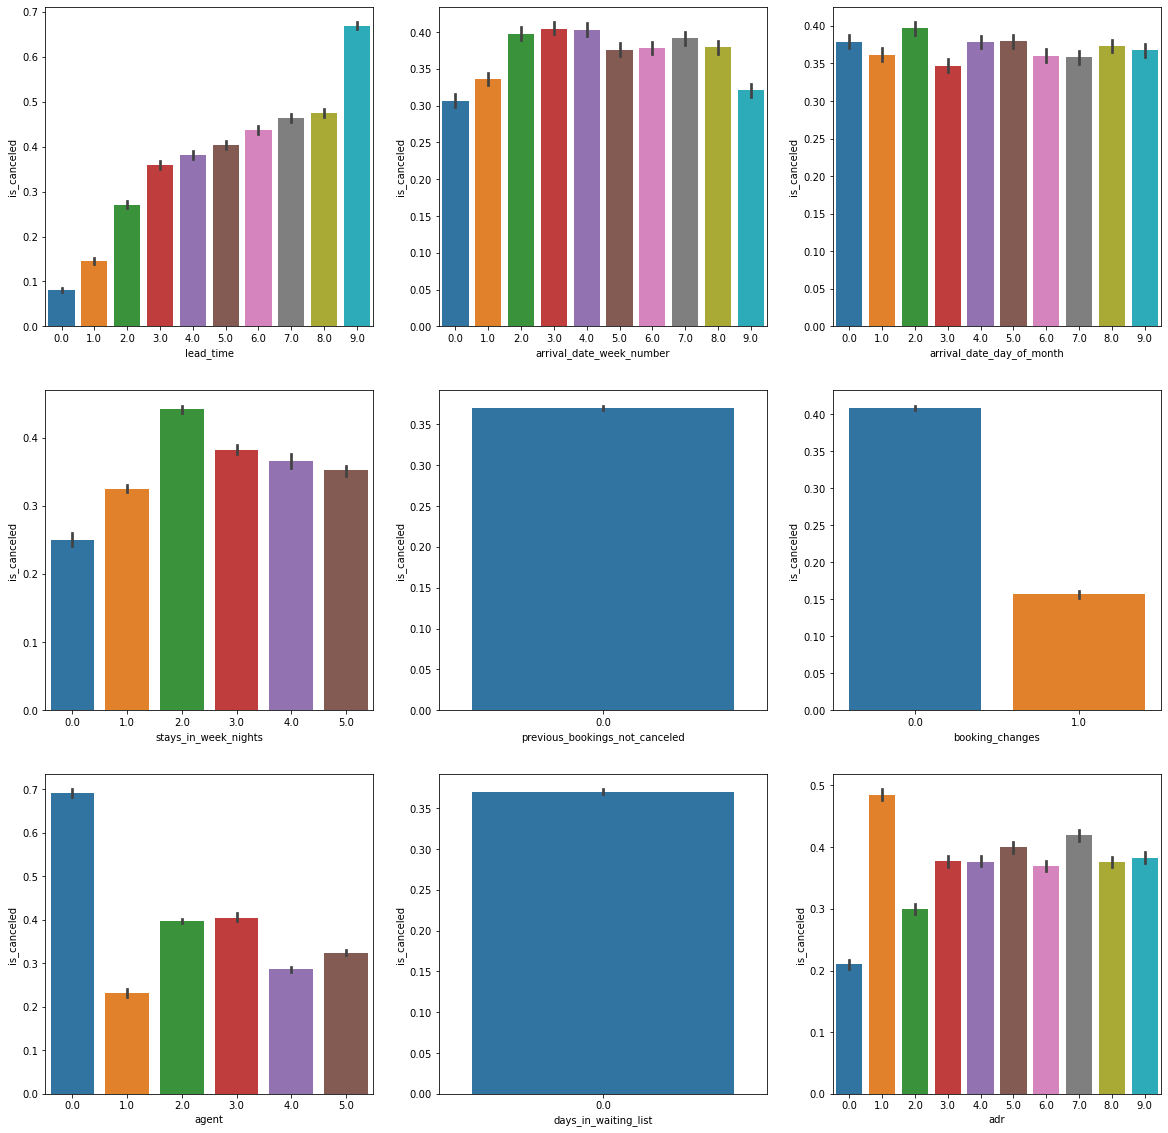

In [29]:
X_num_bin=pd.concat([X_num_bin,y],axis=1)
plt.figure(figsize=(20,20))
for i,var in enumerate(X_num_bin.columns[:-1],1):
    plt.subplot(3,3,i)
    sns.barplot(x=var,y=X_num_bin['is_canceled'],data=X_num_bin)

arrival_date_week_number and arrival_date_day_of_month features ranks are around the mean in which there is no significant change w.r.t target variables.   
previous_bookings_not_canceled and days_in_waiting_list rank doesn't influence target variables.   
So,these features will be dropped.

In [30]:
X_num=X_num.drop(['arrival_date_week_number','arrival_date_day_of_month','previous_bookings_not_canceled','days_in_waiting_list'],axis=1)
X_num.head()

,lead_time,stays_in_week_nights,booking_changes,agent,adr
0,342.0,0.0,3.0,86.008598,0.0
1,444.0,0.0,3.0,86.008598,0.0
2,7.0,1.0,0.0,86.008598,75.0
3,13.0,1.0,0.0,304.000000,75.0
4,14.0,2.0,0.0,240.000000,98.0


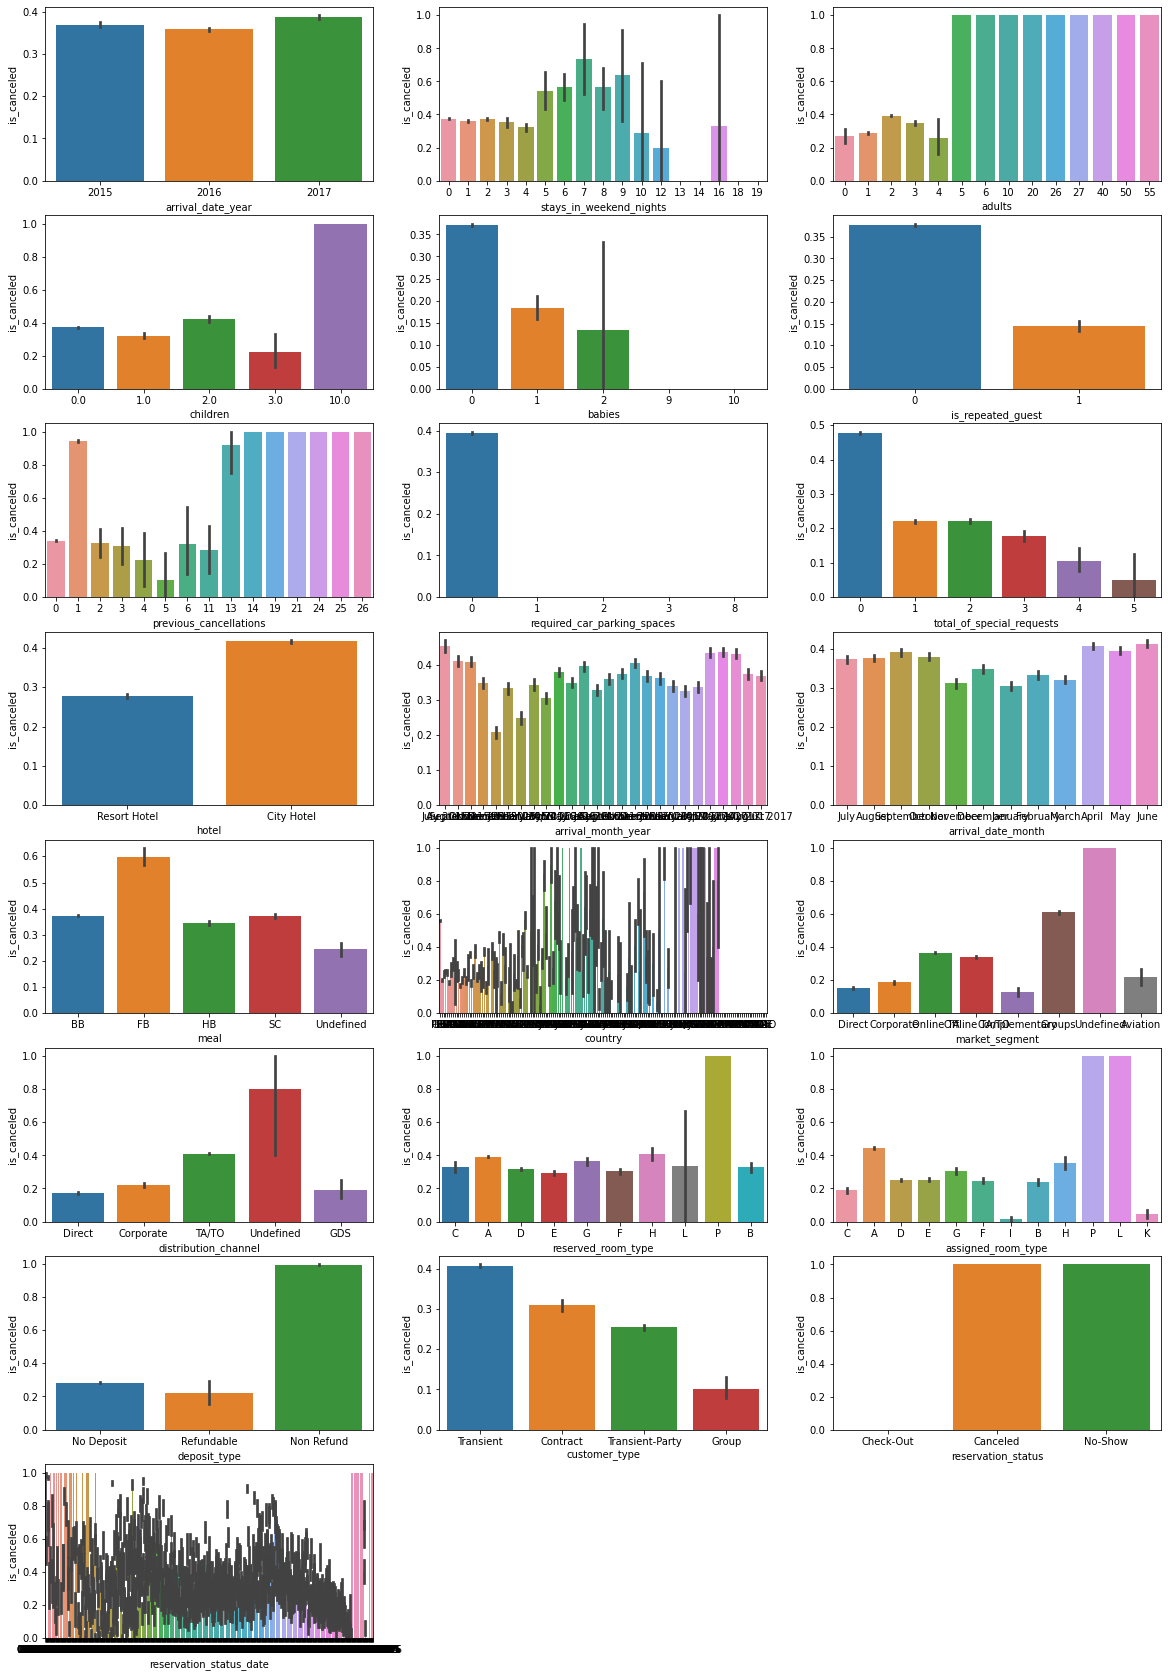

In [31]:
X_char_bin=pd.concat([X_char,y],axis=1)
plt.figure(figsize=(20,30))
for i,var in enumerate(X_char_bin.columns[:-1],1):
    plt.subplot(8,3,i)
    sns.barplot(x=X_char_bin[var],y=X_char_bin['is_canceled'])

In [32]:
X_char=X_char.drop(['arrival_date_month','country','assigned_room_type','reservation_status',
          'reservation_status_date','arrival_date_year'],axis=1)
X_char.head()

,stays_in_weekend_nights,adults,children,babies,is_repeated_guest,previous_cancellations,required_car_parking_spaces,total_of_special_requests,hotel,arrival_month_year,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
0,0,2,0,0,0,0,0,0,Resort Hotel,July 2015,BB,Direct,Direct,C,No Deposit,Transient
1,0,2,0,0,0,0,0,0,Resort Hotel,July 2015,BB,Direct,Direct,C,No Deposit,Transient
2,0,1,0,0,0,0,0,0,Resort Hotel,July 2015,BB,Direct,Direct,A,No Deposit,Transient
3,0,1,0,0,0,0,0,0,Resort Hotel,July 2015,BB,Corporate,Corporate,A,No Deposit,Transient
4,0,2,0,0,0,0,0,1,Resort Hotel,July 2015,BB,Online TA,TA/TO,A,No Deposit,Transient


In [33]:
X_char.shape

(119390, 16)

### One hot encoding for categorical features

In [34]:
X_char_dum=pd.get_dummies(X_char,drop_first=True)
X_char_dum.head()

,stays_in_weekend_nights_1,stays_in_weekend_nights_2,stays_in_weekend_nights_3,stays_in_weekend_nights_4,stays_in_weekend_nights_5,stays_in_weekend_nights_6,stays_in_weekend_nights_7,stays_in_weekend_nights_8,stays_in_weekend_nights_9,stays_in_weekend_nights_10,stays_in_weekend_nights_12,stays_in_weekend_nights_13,stays_in_weekend_nights_14,stays_in_weekend_nights_16,stays_in_weekend_nights_18,stays_in_weekend_nights_19,adults_1,adults_2,adults_3,adults_4,adults_5,adults_6,adults_10,adults_20,adults_26,adults_27,adults_40,adults_50,adults_55,children_1.0,children_2.0,children_3.0,children_10.0,babies_1,babies_2,babies_9,babies_10,is_repeated_guest_1,previous_cancellations_1,previous_cancellations_2,previous_cancellations_3,previous_cancellations_4,previous_cancellations_5,previous_cancellations_6,previous_cancellations_11,previous_cancellations_13,previous_cancellations_14,previous_cancellations_19,previous_cancellations_21,previous_cancellations_24,previous_cancellations_25,previous_cancellations_26,required_car_parking_spaces_1,required_car_parking_spaces_2,required_car_parking_spaces_3,required_car_parking_spaces_8,total_of_special_requests_1,total_of_special_requests_2,total_of_special_requests_3,total_of_special_requests_4,total_of_special_requests_5,hotel_Resort Hotel,arrival_month_year_April 2017,arrival_month_year_August 2015,arrival_month_year_August 2016,arrival_month_year_August 2017,arrival_month_year_December 2015,arrival_month_year_December 2016,arrival_month_year_February 2016,arrival_month_year_February 2017,arrival_month_year_January 2016,arrival_month_year_January 2017,arrival_month_year_July 2015,arrival_month_year_July 2016,arrival_month_year_July 2017,arrival_month_year_June 2016,arrival_month_year_June 2017,arrival_month_year_March 2016,arrival_month_year_March 2017,arrival_month_year_May 2016,arrival_month_year_May 2017,arrival_month_year_November 2015,arrival_month_year_November 2016,arrival_month_year_October 2015,arrival_month_year_October 2016,arrival_month_year_September 2015,arrival_month_year_September 2016,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### Selecting best categorical features using SelectKbest

In [35]:
from sklearn.feature_selection import SelectKBest, chi2
select=SelectKBest(chi2,50)
select.fit_transform(X_char_dum,y)
cols=select.get_support(indices=True)
X_char=X_char_dum.iloc[:,cols]
X_char.shape

(119390, 50)

### Concating all independent variables

In [36]:
X=pd.concat([X_num,X_char],axis=1)
X.shape

(119390, 55)

### Train test split of dataset

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=13)

In [38]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (89542, 55)
Shape of Testing Data (29848, 55)
Response Rate in Training Data is_canceled    0.37101
dtype: float64
Response Rate in Testing Data is_canceled    0.368634
dtype: float64


In [39]:
X.columns

Index(['lead_time', 'stays_in_week_nights', 'booking_changes', 'agent', 'adr',
       'stays_in_weekend_nights_6', 'adults_1', 'adults_2', 'children_1.0',
       'children_2.0', 'babies_1', 'is_repeated_guest_1',
       'previous_cancellations_1', 'previous_cancellations_14',
       'previous_cancellations_19', 'previous_cancellations_24',
       'previous_cancellations_25', 'previous_cancellations_26',
       'required_car_parking_spaces_1', 'total_of_special_requests_1',
       'total_of_special_requests_2', 'total_of_special_requests_3',
       'total_of_special_requests_4', 'hotel_Resort Hotel',
       'arrival_month_year_April 2017', 'arrival_month_year_August 2015',
       'arrival_month_year_February 2017', 'arrival_month_year_January 2016',
       'arrival_month_year_July 2015', 'arrival_month_year_July 2016',
       'arrival_month_year_June 2017', 'arrival_month_year_March 2016',
       'arrival_month_year_March 2017', 'arrival_month_year_May 2017',
       'arrival_month_year_

## Model Building 

### DecisionTree Classifier

#### Hyper parameter tuning

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params={'criterion':['gini','entropy'],
       'max_depth':[50,100,150,200,500],
        'criterion':['gini','entropy'],
        'max_depth':[10,20,50,75,100],
       'min_samples_leaf':[10,20,50,75,100]}
grid_DT=GridSearchCV(DecisionTreeClassifier(),params,scoring='recall',cv=5,n_jobs=-1,verbose=1)
grid_DT.fit(X_train,y_train)
print(grid_DT.best_score_)
print(grid_DT.best_estimator_)
DT_clf=grid_DT.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  2.7min finished


0.7215014208580053
DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=10)


### Result display function

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
def results(clf,X_train,y_train,X_test,y_test):
    print('========================================================================')
    print('Train data result summary')
    print('========================================================================')
    y_pred=clf.predict(X_train)
    score=accuracy_score(y_train,y_pred)
    c_matrix=confusion_matrix(y_train,y_pred)
    c_report=classification_report(y_train,y_pred,output_dict=True)
    print('Accuracy score : ')
    print(str(score)+'\n')
    print('Confusion matrix : ')
    display(pd.DataFrame(c_matrix))
    print('Classification report : ')
    display(pd.DataFrame(c_report))
    
    print('\n========================================================================')
    print('Test data result summary')
    print('========================================================================')
    y_pred1=clf.predict(X_test)
    score=accuracy_score(y_test,y_pred1)
    c_matrix=confusion_matrix(y_test,y_pred1)
    c_report=classification_report(y_test,y_pred1,output_dict=True)
    print('Accuracy score : ')
    print(str(score)+'\n')
    print('Confusion matrix : ')
    display(pd.DataFrame(c_matrix))
    print('Classification report : ')
    display(pd.DataFrame(c_report))

### Evaluation

In [44]:
results(DT_clf,X_train,y_train,X_test,y_test)

Train data result summary
Accuracy score : 
0.8799111031694624

Confusion matrix : 


,0,1
0,52396,3925
1,6828,26393


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.884709,0.870539,0.879911,0.877624,0.879452
recall,0.930310,0.794467,0.879911,0.862389,0.879911
f1-score,0.906937,0.830765,0.879911,0.868851,0.878676
support,56321.000000,33221.000000,0.879911,89542.000000,89542.000000



Test data result summary
Accuracy score : 
0.8301728759045832

Confusion matrix : 


,0,1
0,16766,2079
1,2990,8013


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.848654,0.793995,0.830173,0.821324,0.828505
recall,0.889679,0.728256,0.830173,0.808967,0.830173
f1-score,0.868682,0.759706,0.830173,0.814194,0.828510
support,18845.000000,11003.000000,0.830173,29848.000000,29848.000000


Accuracy: 0.8301728759045832
Precision 0.7939952437574316
Recall 0.7282559302008543
f1_score 0.7597060914908746


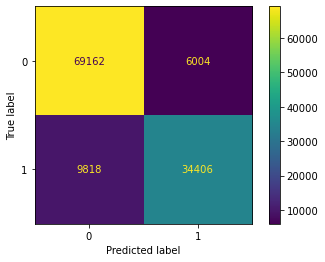

In [46]:
from sklearn import metrics
y_pred=DT_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))
metrics.plot_confusion_matrix(DT_clf,X,y)

### RandomForest Classifier

In [237]:
from sklearn.ensemble import RandomForestClassifier
RF_clf=RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_leaf=10)
RF_clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_leaf=10)

### Evaluation

In [238]:
results(RF_clf,X_train,y_train,X_test,y_test)

Train data result summary
Accuracy score : 
0.8488418842554332

Confusion matrix : 


,0,1
0,53625,2696
1,10839,22382


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.831860,0.892495,0.848842,0.862178,0.854356
recall,0.952132,0.673730,0.848842,0.812931,0.848842
f1-score,0.887941,0.767835,0.848842,0.827888,0.843381
support,56321.000000,33221.000000,0.848842,89542.000000,89542.000000



Test data result summary
Accuracy score : 
0.8397882605199678

Confusion matrix : 


,0,1
0,17811,1034
1,3748,7255


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.826151,0.875256,0.839788,0.850704,0.844253
recall,0.945131,0.659366,0.839788,0.802248,0.839788
f1-score,0.881645,0.752125,0.839788,0.816885,0.833900
support,18845.000000,11003.000000,0.839788,29848.000000,29848.000000


Accuracy: 0.8399557759313857
Precision 0.8746990852190659
Recall 0.6604562392074889
f1_score 0.7526280358344984


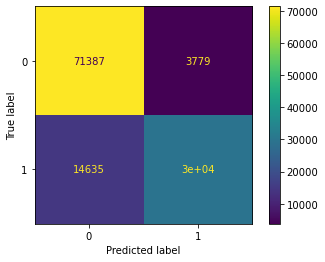

In [64]:
from sklearn import metrics
y_pred=RF_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))
metrics.plot_confusion_matrix(RF_clf,X,y)

### GradientBoosting Classifier

In [60]:
'''from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[25,50,100],
        'learning_rate':[0.1,0.3,0.5]
       }
grid_GBM=GridSearchCV(GradientBoostingClassifier(),params,scoring='recall',cv=5,n_jobs=-1,verbose=1)
grid_GBM.fit(X_train,y_train)
print(grid_GBM.best_score_)
print(grid_GBM.best_estimator_)
GBM_clf=grid_GBM.best_estimator_'''

"from sklearn.ensemble import GradientBoostingClassifier\nfrom sklearn.model_selection import GridSearchCV\nparams={'n_estimators':[25,50,100],\n        'learning_rate':[0.1,0.3,0.5]\n       }\ngrid_GBM=GridSearchCV(GradientBoostingClassifier(),params,scoring='recall',cv=5,n_jobs=-1,verbose=1)\ngrid_GBM.fit(X_train,y_train)\nprint(grid_GBM.best_score_)\nprint(grid_GBM.best_estimator_)\nGBM_clf=grid_GBM.best_estimator_"

### Evaluation

In [62]:
GBM_clf=GradientBoostingClassifier(n_estimators=50,criterion='mse', max_depth=20, min_samples_leaf=10,
                                  learning_rate=0.1)
GBM_clf.fit(X_train,y_train)
results(GBM_clf,X_train,y_train,X_test,y_test)

Train data result summary
Accuracy score : 
0.9320989033079449

Confusion matrix : 


,0,1
0,54224,2097
1,3983,29238


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.931572,0.933078,0.932099,0.932325,0.932131
recall,0.962767,0.880106,0.932099,0.921436,0.932099
f1-score,0.946913,0.905818,0.932099,0.926365,0.931666
support,56321.000000,33221.000000,0.932099,89542.000000,89542.000000



Test data result summary
Accuracy score : 
0.8603591530420799

Confusion matrix : 


,0,1
0,17403,1442
1,2726,8277


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.864574,0.851631,0.860359,0.858102,0.859802
recall,0.923481,0.752249,0.860359,0.837865,0.860359
f1-score,0.893057,0.798861,0.860359,0.845959,0.858333
support,18845.000000,11003.000000,0.860359,29848.000000,29848.000000


Accuracy: 0.8603591530420799
Precision 0.851630826216689
Recall 0.7522493865309461
f1_score 0.7988611137921049


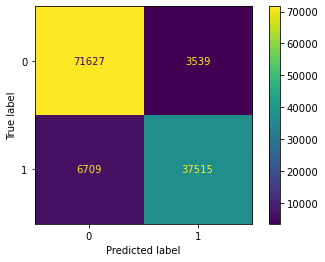

In [63]:
from sklearn import metrics
y_pred=GBM_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))
print("f1_score",metrics.f1_score(y_test,y_pred))
metrics.plot_confusion_matrix(GBM_clf,X,y)

## Customers ranking 

In [148]:
y_pred_prob = GBM_clf.predict_proba(X)[:, 1]
#df['y_pred_P']==pd.DataFrame(y_pred_prob)
df['P_Rank']=pd.qcut(df['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_act=pd.DataFrame(df.groupby('P_Rank')['is_canceled'].agg(['count','mean']))
rank_df_act.rename(columns={'count':'Count','mean':'Actual_event_rate'},inplace=True)
rank_df_pred=pd.DataFrame(df.groupby('P_Rank')['y_pred_P'].agg('mean'))
rank_df_pred.rename(columns={'y_pred_P':'Pred_event_rate'},inplace=True)

rank_df=pd.concat([rank_df_act,rank_df_pred],axis=1,join='inner')
sorted_rank_df=rank_df.sort_values(by='P_Rank',ascending=False)

sorted_rank_df['N_events']=sorted_rank_df['Count']*sorted_rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df=sorted_rank_df.reset_index()
sorted_rank_df['Deciles']=sorted_rank_df.index+1

### Ranking customers based on event rates.

In [149]:
sorted_rank_df

,P_Rank,Count,Actual_event_rate,Pred_event_rate,N_events,cum_events,event_cap,cum_event_cap,Deciles
0,10,11939,1.000000,0.995977,11939.0,11939.0,0.269967,0.269967,1
1,9,11939,0.987771,0.938156,11793.0,23732.0,0.266665,0.536632,2
2,8,11939,0.849904,0.740086,10147.0,33879.0,0.229446,0.766077,3
3,7,11939,0.572661,0.485338,6837.0,40716.0,0.154599,0.920677,4
4,6,11939,0.191557,0.263179,2287.0,43003.0,0.051714,0.972391,5
5,5,11939,0.057626,0.133868,688.0,43691.0,0.015557,0.987948,6
6,4,11939,0.022950,0.071515,274.0,43965.0,0.006196,0.994143,7
7,3,11939,0.013150,0.040658,157.0,44122.0,0.003550,0.997694,8
8,2,11939,0.007622,0.022592,91.0,44213.0,0.002058,0.999751,9
9,1,11939,0.000921,0.007603,11.0,44224.0,0.000249,1.000000,10


<AxesSubplot:xlabel='Deciles', ylabel='cum_event_cap'>

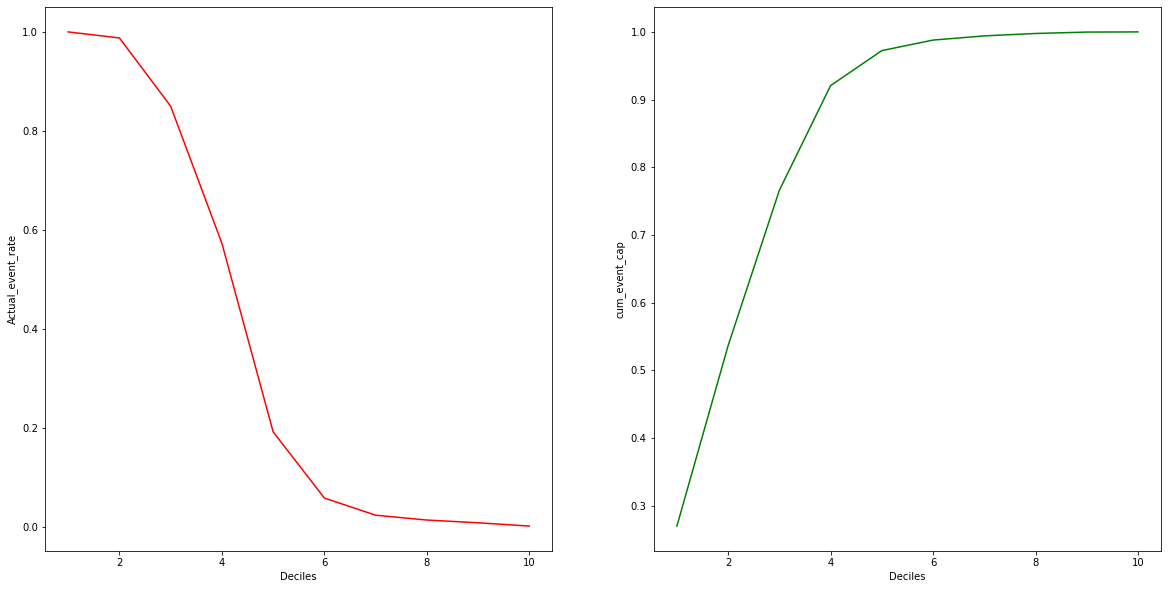

In [166]:
fig,axe =plt.subplots(1,2,figsize=(20,10))
sns.lineplot(ax=axe[0],x=sorted_rank_df['Deciles'],y=sorted_rank_df['Actual_event_rate'],color='r')
sns.lineplot(ax=axe[1],x=sorted_rank_df['Deciles'],y=sorted_rank_df['cum_event_cap'],color='g')

### Seperating out top 3 rank customers

In [170]:
df['Pred_cancel_rank']=np.where(df['P_Rank']<8,'Bottom7','Top3')

In [175]:
df_Top3=df[df['Pred_cancel_rank']=='Top3']
df_Top3.shape

(35817, 36)

### Ranking customers based on lead_time

In [189]:
df['lead_time_rank']=pd.qcut(df['lead_time'].rank(method='first').values,10).codes+1

In [196]:
df.groupby('lead_time_rank')['lead_time'].agg(['min','mean','max'])

,min,mean,max
lead_time_rank,,,
1,0,0.652735,3
2,3,6.449703,11
3,11,18.337465,26
4,26,35.099757,45
5,45,56.680291,69
6,69,83.823603,99
7,99,117.566044,138
8,138,160.550130,184
9,184,219.433286,265


In [198]:
df['lead_time_segment']=np.where(df['lead_time_rank']>=7,'High_lead_time','Low_lead_time')
df.head()

,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,y_pred_P,P_Rank,Pred_cancel_rank,lead_time_rank,lead_time_segment
0,Resort Hotel,0,342,July 2015,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015,0.062760,4,Bottom7,10,High_lead_time
1,Resort Hotel,0,737,July 2015,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015,0.081175,4,Bottom7,10,High_lead_time
2,Resort Hotel,0,7,July 2015,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015,0.058306,4,Bottom7,2,Low_lead_time
3,Resort Hotel,0,13,July 2015,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015,0.089430,4,Bottom7,3,Low_lead_time
4,Resort Hotel,0,14,July 2015,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015,0.149699,5,Bottom7,3,Low_lead_time


In [202]:
df.groupby(['lead_time_segment'])['lead_time'].agg(['count','min','mean','max'])

,count,min,mean,max
lead_time_segment,,,,
High_lead_time,47756,99,209.767652,737
Low_lead_time,71634,0,33.507259,99


### Ranking based on average daily rates

In [210]:
df['adr_rank']=pd.qcut(df['adr'].rank(method='first').values,10).codes+1
df.head()

,hotel,is_canceled,lead_time,arrival_month_year,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,y_pred_P,P_Rank,Pred_cancel_rank,lead_time_rank,lead_time_segment,adr_rank
0,Resort Hotel,0,342,July 2015,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015,0.062760,4,Bottom7,10,High_lead_time,1
1,Resort Hotel,0,737,July 2015,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015,0.081175,4,Bottom7,10,High_lead_time,1
2,Resort Hotel,0,7,July 2015,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015,0.058306,4,Bottom7,2,Low_lead_time,3
3,Resort Hotel,0,13,July 2015,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015,0.089430,4,Bottom7,3,Low_lead_time,3
4,Resort Hotel,0,14,July 2015,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015,0.149699,5,Bottom7,3,Low_lead_time,6


In [214]:
df['adr_segmentnp']=np.where(df['adr_rank']<=7,'Low_adr','High_adr')
df.groupby(['adr_segmentnp'])['adr'].agg(['count','min','mean','max'])

,count,min,mean,max
adr_segmentnp,,,,
High_adr,35817,118.15,159.139202,5400.00
Low_adr,83573,-6.38,77.270516,118.15


### Cross tab between lead_time and adr

In [218]:
pd.crosstab(index=df['adr_segmentnp'],columns=df['lead_time_segment'],values=df['adr'],aggfunc='mean')

lead_time_segment,High_lead_time,Low_lead_time
adr_segmentnp,,
High_adr,155.069745,161.413295
Low_adr,81.216007,74.439252


In [219]:
pd.crosstab(index=df['adr_segmentnp'],columns=df['lead_time_segment'],values=df['is_canceled'],aggfunc='mean')

lead_time_segment,High_lead_time,Low_lead_time
adr_segmentnp,,
High_adr,0.505685,0.329199
Low_adr,0.512172,0.252461


### Services for top3 rank customers

In [225]:
service_list=['stays_in_weekend_nights','total_of_special_requests','reserved_room_type']
df_top3_sl=df_Top3.loc[:,service_list]
df_top3_sl.shape

(35817, 3)

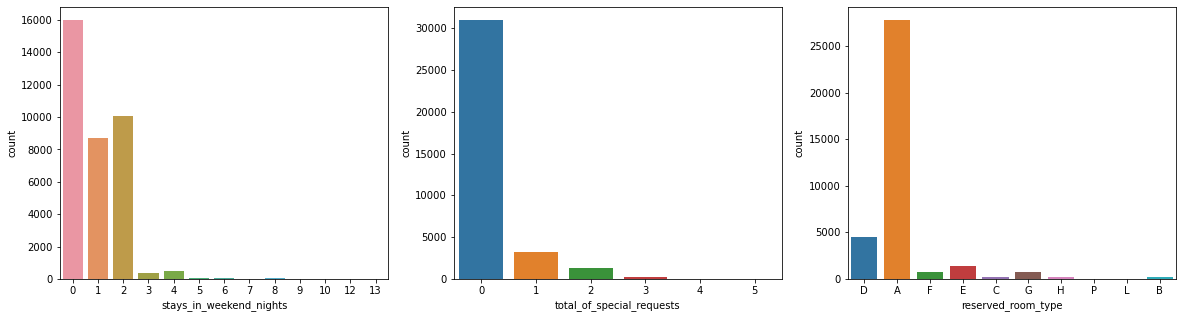

In [234]:
plt.figure(figsize=(20,5))
for i,var in enumerate(df_top3_sl.columns,1):
    plt.subplot(1,3,i)
    sns.countplot(df_top3_sl[var])

## Inference

***
- Out of all the models GBM model have given best f1 score.   
- Using GBM predicted probability value ranking of the customers are done.      
- Top3 rank cancelling customers are identified and service provided is analysed.   
- Also low and high adr w.r.t lead_time is analysed.   
- Cancellation is analysed w.r.t lead_time and adr.   
***